In [1]:
import pandas as pd
import numpy as np
import math

UNCLASSIFIED = False
NOISE = -1

In [4]:
def _dist(p,q):
    # compute and return the euclidean distance
    # put your code here
    distance = np.sqrt(np.sum((np.array(p) - np.array(q))**2))
    return distance    

In [3]:
def _eps_neighborhood(p,q,eps):
    # check if the distance between p and q is below eps
    # return True or False
    # put your code here
    return _dist(p, q) < eps

In [5]:
def _region_query(m, point_id, eps):
    n_points = m.shape[1]
    seeds = []
    # find and return all points that belong to eps-neighborhood of point_id
    # put your code here
    for i in range(n_points):
        if _eps_neighborhood(m[:, point_id], m[:, i], eps):
            seeds.append(i)
    return seeds

In [6]:
def _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points):
    # expand the cluster of cluster_id from point_id
    # identify all points belonging to cluster_id
    # update the clustering results in "classification" by assigning cluster_id to each point
    # return True if point_id is a core, False if point_id is not a core
    # write your code below
    seeds = _region_query(m, point_id, eps)

    # 檢查該點是否是核心點（鄰域中的點數是否大於等於 min_points）
    if len(seeds) < min_points:
        # 如果不是核心點，將其標記為噪點
        classifications[point_id] = NOISE
        return False
    else:
        # 如果是核心點，將所有鄰域內的點分配給當前的 cluster_id
        classifications[point_id] = cluster_id
        for seed_id in seeds:
            classifications[seed_id] = cluster_id

        # 擴展群，經過所有seeds
        while seeds:
            current_point = seeds.pop(0)
            new_seeds = _region_query(m, current_point, eps)

            # 如果鄰域內的點數大於等於 min_points，繼續擴展
            if len(new_seeds) >= min_points:
                for new_seed in new_seeds:
                    if classifications[new_seed] == UNCLASSIFIED:
                        classifications[new_seed] = cluster_id
                        seeds.append(new_seed)
        return True

In [7]:
import random

In [12]:
def dbscan(m, eps, min_points):
    """Implementation of DBSCAN
    You can refer to wikipedia for detailed algorithm: https://en.wikipedia.org/wiki/DBSCAN
    Use Euclidean Distance as the measure
    
    Inputs:
    m - A matrix whose columns are feature vectors
    eps - Maximum distance two points can be to be regionally related
    min_points - The minimum number of points to make a cluster
    
    Outputs:
    An array with either a cluster id number or dbscan.NOISE (None) for each column vector in m
    """
    cluster_id = 1
    n_points = m.shape[1]
    classifications = [UNCLASSIFIED] * n_points
    # the main dbscan algorithm
    # put your code here

    for point_id in range(n_points):  # 遍歷每個點
        if classifications[point_id] == UNCLASSIFIED:     # 如果這個點是未分類的，對其進行擴展或噪點判定
                if _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points):
                        cluster_id += 1  # 創建新群
                        
    return classifications

In [13]:
# test here
dataset_1 = pd.read_csv('blobs.csv')[:80].values
m = np.asmatrix(dataset_1)
m = m.transpose()

In [14]:
eps = 1.6
min_points = 5
a = dbscan(m, eps, min_points)

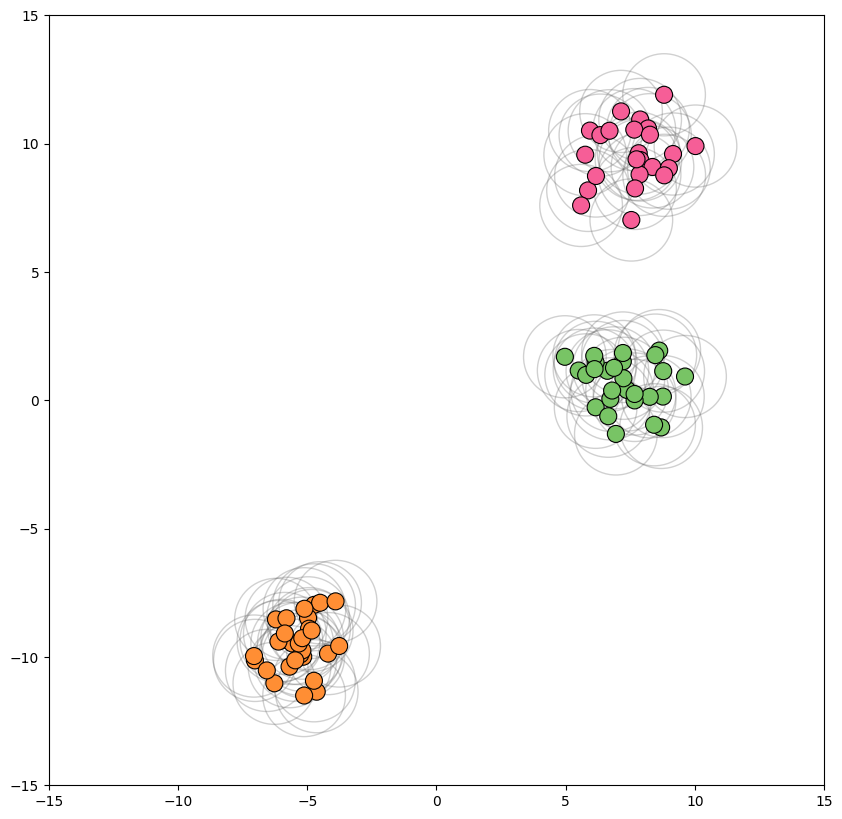

In [16]:
%matplotlib inline
import dbscan_lab_helper as helper

result = np.asarray(a)
helper.plot_clustered_dataset(dataset_1, result, neighborhood=True, epsilon=eps)

In [17]:
dataset_2 = pd.read_csv('varied.csv')[:300].values
m = np.asmatrix(dataset_2)
m = m.transpose()

In [18]:
eps = 1.3
min_points = 5
a = dbscan(m, eps, min_points)

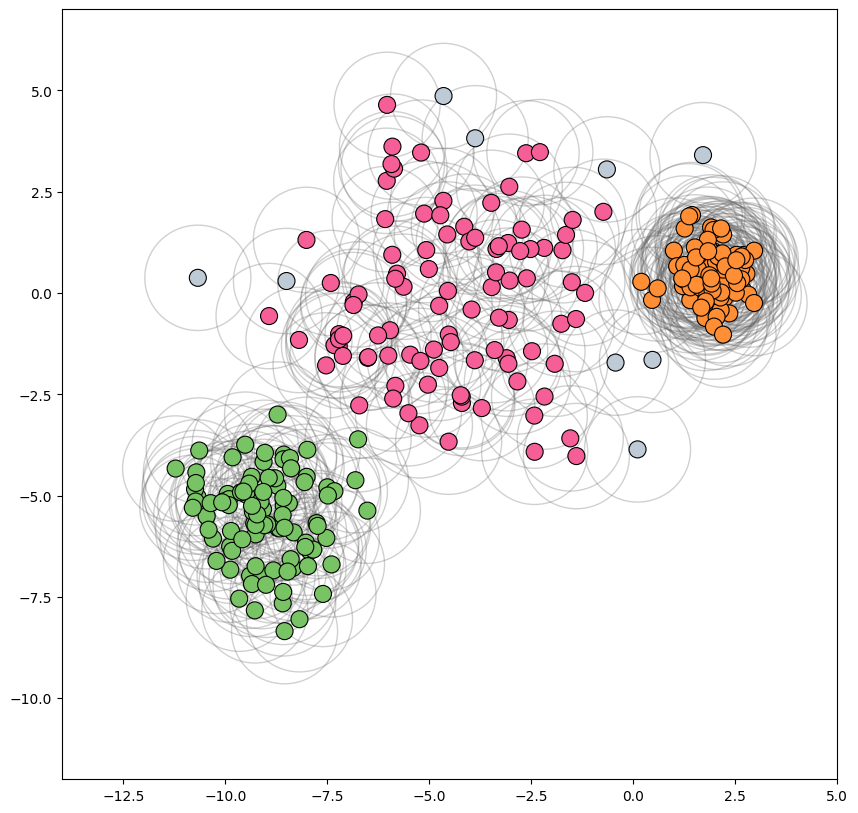

In [19]:
result = np.asarray(a)
helper.plot_clustered_dataset(dataset_2, result, xlim=(-14, 5), ylim=(-12, 7), neighborhood=True, epsilon=eps)
